In [1]:
#Machine Learning Assignment 1 – PS2
#Group 33
#Subject Code: S2-22_DSECCZG565
#Active Members
#(1) Debarati Banerjee - 2022C104015 (2)Mrutyunjay Shivam Shukla - 2022c104060 (3)Mala Kumari 2022C104026

#Exploratory Data Analysis
#Importing all the necessary libraries from their respective repositories:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Reading the CSV dataset in the form of pandas dataframe: 
#Assuming 'Not Specified' data in dataset as Null
data=pd.read_csv('dataSetFull.csv')

In [3]:
#having a glimpse of the data:
data.head(5)

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1


In [4]:
#Analyzing the data volume and the datatypes present in the dataset
print('This dataset has ' + str(data.shape[0]) + ' rows, and ' + str(data.shape[1]) + ' columns')

This dataset has 8129 rows, and 26 columns


In [5]:
data.dtypes

id                      object
price_tnd              float64
price_eur              float64
location                object
city                    object
governorate             object
Area                   float64
pieces                 float64
room                   float64
bathroom               float64
age                     object
state                  float64
latt                   float64
long                   float64
distance_to_capital    float64
garage                   int64
garden                   int64
concierge                int64
beach_view               int64
mountain_view            int64
pool                     int64
elevator                 int64
furnished                int64
equipped_kitchen         int64
central_heating          int64
air_conditioning         int64
dtype: object

In [6]:
#analyzing the statistical attributes of the dataset:
data.describe()

,price_tnd,price_eur,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.421000e+03,6.421000e+03,7944.000000,6940.000000,7720.000000,7470.000000,7029.000000,8094.000000,8094.000000,8094.000000,...,8129.0,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000
mean,6.812867e+05,2.112588e+05,369.742951,4.318300,3.325389,1.997724,1.386826,36.421537,10.396046,65.495742,...,0.0,0.245295,0.104072,0.082544,0.231886,0.262271,0.048099,0.568582,0.558248,0.550129
std,8.825321e+05,2.737262e+05,955.113560,2.270759,2.020898,1.237548,0.574206,1.144072,0.409603,126.346464,...,0.0,0.430288,0.305373,0.275209,0.422062,0.439896,0.213989,0.495305,0.496626,0.497511
min,6.500000e+03,2.015000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.428052,0.003560,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,8.060000e+04,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.195560,11.345082,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1.302000e+05,178.000000,4.000000,3.000000,2.000000,1.000000,36.818810,10.325278,17.722190,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.800000e+05,2.418000e+05,371.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,5.890000e+06,22000.000000,27.000000,50.000000,20.000000,2.000000,40.565098,11.331493,4224.947771,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Dropping age, latt, long
data.drop(['age'], axis=1)
data.drop(['latt'], axis=1)
data.drop(['long'], axis=1)

#Finding the null values(if any they will be removed or replaced in the preprocessing stage)
data.isnull().sum()

id                        0
price_tnd              1708
price_eur              1708
location                  0
city                   1316
governorate               0
Area                    185
pieces                 1189
room                    409
bathroom                659
age                    4145
state                  1100
latt                     35
long                     35
distance_to_capital      35
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64

In [8]:
#Dropping any existing duplicate row entries:
data = data.drop_duplicates(keep='first')

In [9]:
data.shape

(8129, 26)

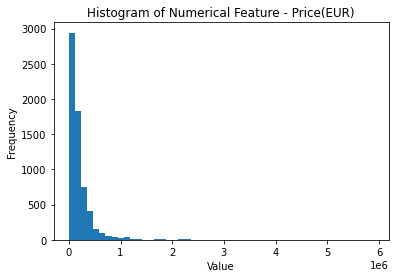

In [10]:
#Vizualizing a numerical datatype, for example - Price (EUR)
# Visualize the data
# Example: Histogram of a numerical feature
plt.hist(data['price_eur'], bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Feature - Price(EUR)')
plt.show()

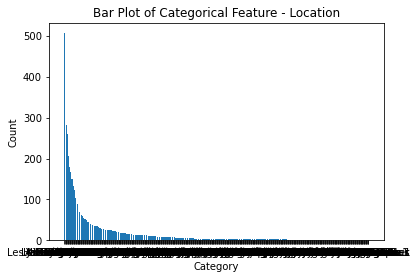

In [11]:
#Vizualizing a categorical datatype, for example - Location
# Example: Bar plot of a categorical feature
plt.bar(data['location'].value_counts().index, data['location'].value_counts().values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categorical Feature - Location')
plt.show()

In [12]:
#Classification
#Checking for mixed variables:
b=[]
c=data.shape
print("No. of columns:",c[1])
for i in data.columns:
    b.insert(0,data[i].dtypes)
print("No. of unique datatypes:",len(b))
if len(b)==c[1]:
 print("There are no mixed variables.All columns have unique datatypes")

No. of columns: 26
No. of unique datatypes: 26
There are no mixed variables.All columns have unique datatypes


In [13]:
#Checking for constant features and also removing them from the dataset:
constant_features = [feat for feat in data.columns if data[feat].nunique() == 1]
print("The constant features are:",constant_features)

The constant features are: ['garden']


In [14]:
data.drop(constant_features, axis=1, inplace=True)

In [15]:
#checking the data shape after dropping the constant features
data.shape

(8129, 25)

In [16]:
#Separation of the target variable:
#Since this is a classification problem, we have to choose the target variable that holds considerably discrete values and is not continuous in nature.
#To be able to predict the output class with the highest probability, the target variable is chosen to be "Location".
#The y_pred will give the name of the predicted location over the iteration of an unknown dataset.
#Hence the target variable is chosen to be "Location" in this case.
# Separate target variable
X = data.drop('location', axis=1)
y = data['location']

In [17]:
#Handling the missing values and replace them with the mean value, handling the other categorical features using label encoder, and scaling the other numerical features using Standard Scaler.
# Handle missing values (example: fill with mean)
X.fillna(X.mean(), inplace=True)

/var/folders/0g/7__wrtys78v4x17kz60k8b080000gn/T/ipykernel_3596/4169831141.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


In [18]:
# Handle categorical variables (example: label encoding)
cat_features = X.select_dtypes(include=['object']).columns
for feature in cat_features:
    X[feature] = X[feature].astype(str)
    X[feature] = LabelEncoder().fit_transform(X[feature])

In [19]:
# Normalize numerical features (example: standard scaling)
num_features = X.select_dtypes(include=['float', 'int']).columns
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [20]:
#Splitting of data set in a ratio of 0.2
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [21]:
#cross-checking if there are any null values:
X_train.isnull().sum()

id                     0
price_tnd              0
price_eur              0
city                   0
governorate            0
Area                   0
pieces                 0
room                   0
bathroom               0
age                    0
state                  0
latt                   0
long                   0
distance_to_capital    0
garage                 0
concierge              0
beach_view             0
mountain_view          0
pool                   0
elevator               0
furnished              0
equipped_kitchen       0
central_heating        0
air_conditioning       0
dtype: int64

In [22]:
#Examining the shapes of the train and test data set to ensure compatibility of the model fit and transform procedures:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7316, 24)
(7316,)
(813, 24)
(813,)


<AxesSubplot:>

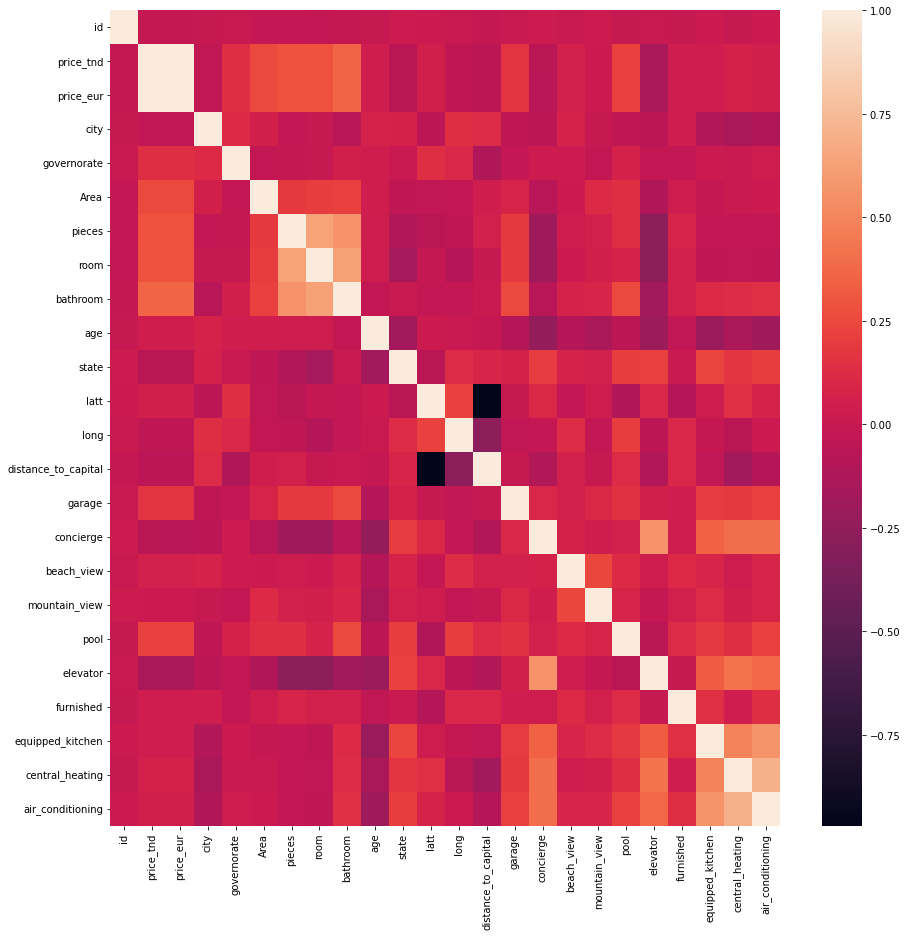

In [23]:
#Vizualizing the correlation between the features in the train dataset:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat)

In [24]:
# Create a logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [25]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [27]:
#having a look at the y_pred 
print(y_pred)

['La Manouba' 'Cité Ennasr 2' 'Hammamet' 'El Menzah 9' 'Hammamet Nord'
 'El Menzah 5' 'Les Jardins de Carthage' 'La Marsa' 'Bizerte'
 'Cité Ennasr 2' 'Khezama' 'Cité Ennasr 2' 'Bou Mhel' 'Cité El Wafa'
 'Les Berges Du Lac 2' 'La Soukra' 'Ennasr' 'Aouina' 'El Golâa'
 'Les Jardins de Carthage' 'El Menzah 9' 'Djerba' 'Hammamet Sud'
 'Ain Zaghouan Nord' 'Ain Zaghouan Nord' 'La Soukra' 'Sakiet Ezzit'
 'Cité Ennasr 2' 'La Marsa' 'El Manar 1' 'Rades Plage' 'Djerba'
 'El Menzah 9' 'Akouda' 'Les Jardins de Carthage' 'Ghar El Melh' 'Aouina'
 'Hammamet' 'La Soukra' 'La Soukra' 'Raf Raf' 'Cité El Wafa' 'Kélibia'
 'La Soukra' 'Hammamet' 'Sahloul' 'Hammam Sousse' 'Mornag' 'Kélibia'
 'Les Jardins de Carthage' 'La Soukra' 'La Soukra' 'Cité El Wafa'
 'Cité Ennour Jaafar' 'Kélibia' 'Gabès' 'La Soukra' 'La Marsa'
 'Ain Zaghouan Nord' 'La Marsa' 'La Soukra' 'Raoued' 'Ras Jebel'
 'Ras Jebel' 'Djerba' 'Les Jardins de Carthage' 'La Soukra' 'La Manouba'
 'Hammamet Sud' 'La Soukra' 'Ain Zaghouan Nord' 'La Mars

In [28]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.4071340713407134


In [29]:
#As we can see the model can predict the output class label or the target variable ("Brand") with a accuracy of 40.71% which is quite high, taking into consideration the amount of dataset volume fed to the model for training.

In [30]:
# Regression

In [31]:
#Importing required libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
#Loading CSV dataset as pandas dataframe:
#Assuming 'Not Specified' data in dataset as Null
# Load the dataset into a pandas DataFrame
data1 = pd.read_csv('dataSetFull.csv')
data1.head(5)

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1


In [33]:
data1.dtypes

id                      object
price_tnd              float64
price_eur              float64
location                object
city                    object
governorate             object
Area                   float64
pieces                 float64
room                   float64
bathroom               float64
age                     object
state                  float64
latt                   float64
long                   float64
distance_to_capital    float64
garage                   int64
garden                   int64
concierge                int64
beach_view               int64
mountain_view            int64
pool                     int64
elevator                 int64
furnished                int64
equipped_kitchen         int64
central_heating          int64
air_conditioning         int64
dtype: object

In [34]:
#checking statistical attributes
data1.describe()

,price_tnd,price_eur,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.421000e+03,6.421000e+03,7944.000000,6940.000000,7720.000000,7470.000000,7029.000000,8094.000000,8094.000000,8094.000000,...,8129.0,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000
mean,6.812867e+05,2.112588e+05,369.742951,4.318300,3.325389,1.997724,1.386826,36.421537,10.396046,65.495742,...,0.0,0.245295,0.104072,0.082544,0.231886,0.262271,0.048099,0.568582,0.558248,0.550129
std,8.825321e+05,2.737262e+05,955.113560,2.270759,2.020898,1.237548,0.574206,1.144072,0.409603,126.346464,...,0.0,0.430288,0.305373,0.275209,0.422062,0.439896,0.213989,0.495305,0.496626,0.497511
min,6.500000e+03,2.015000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.428052,0.003560,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,8.060000e+04,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.195560,11.345082,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1.302000e+05,178.000000,4.000000,3.000000,2.000000,1.000000,36.818810,10.325278,17.722190,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.800000e+05,2.418000e+05,371.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,5.890000e+06,22000.000000,27.000000,50.000000,20.000000,2.000000,40.565098,11.331493,4224.947771,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#checking for null values(if any will be handled in the later preprocessing part)
data1.isnull().sum()

id                        0
price_tnd              1708
price_eur              1708
location                  0
city                   1316
governorate               0
Area                    185
pieces                 1189
room                    409
bathroom                659
age                    4145
state                  1100
latt                     35
long                     35
distance_to_capital      35
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64

In [36]:
#capturing constant features
constant_features = [feat for feat in data1.columns if data1[feat].nunique() == 1]
print("The constant features are:",constant_features)

The constant features are: ['garden']


In [37]:
#dropping the constant features
data1.drop(constant_features, axis=1, inplace=True)

In [38]:
#checking the shape of dataset after dropping constant features
data1.shape

(8129, 25)

In [39]:
# Separate target variable
X1 = data1.drop('price_eur', axis=1)
y1 = data1['price_eur']

In [40]:
# Handle missing values (example: fill with mean)
X1.fillna(X1.mean(), inplace=True)

# Handle categorical variables (example: label encoding)
cat_features1 = X1.select_dtypes(include=['object']).columns
for feature in cat_features1:
    X1[feature] = X1[feature].astype(str)
    X1[feature] = LabelEncoder().fit_transform(X1[feature])

# Normalize numerical features (example: standard scaling)
num_features1 = X1.select_dtypes(include=['float', 'int']).columns
scaler = StandardScaler()
X1[num_features1] = scaler.fit_transform(X1[num_features1])

/var/folders/0g/7__wrtys78v4x17kz60k8b080000gn/T/ipykernel_3596/3509622402.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X1.fillna(X1.mean(), inplace=True)


In [41]:
#checking the shapes of test and train sets
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

NameError: name 'X1_train' is not defined

In [42]:
# Create a linear regression model
model = LinearRegression()

In [43]:
# Train the model
model.fit(X1_train, y1_train)

NameError: name 'X1_train' is not defined

In [44]:
# Make predictions on the testing set
y1_pred = model.predict(X1_test)

NameError: name 'X1_test' is not defined

In [45]:
print(y1_pred)

NameError: name 'y1_pred' is not defined

In [46]:
# Model evaluation
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

# Print the evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

NameError: name 'y1_test' is not defined